Se importar los datos en formato .zip, y se extraen en la maquina virtual

In [1]:
import os
import zipfile

local_zip = 'Data_T2.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

Aqui se define, los directorios de donde se sacara la data de la imagen.

In [2]:
base_dir = '/tmp/Data_T2'


train_leo_dir = os.path.join(base_dir, 'Leopardo2')
train_lince_dir = os.path.join(base_dir, 'Lince iberico')
train_ocelote_dir = os.path.join(base_dir, 'Ocelote')
train_guepardo_dir = os.path.join(base_dir, 'Guepardo')
train_serval_dir = os.path.join(base_dir, 'Serval')

# Sección nueva

Aqui no mas se muestran el nombre de los archivos, 

In [3]:
train_leo_fnames = os.listdir( train_leo_dir )
train_lince_fnames = os.listdir( train_lince_dir )
train_ocelote_fnames = os.listdir(train_ocelote_dir)
train_guepardo_fnames = os.listdir(train_guepardo_dir)
train_serval_fnames = os.listdir(train_serval_dir)

print(train_leo_fnames[:10])
print(train_lince_fnames[:10])
print(train_ocelote_fnames[:10])
print(train_guepardo_fnames[:10])
print(train_serval_fnames[:10])

['leopardo (87).jpg', 'leopardo (26).jpg', 'leopardo (54).jpg', 'leopardo (6).jpg', 'leopardo (23).jpg', 'leopardo (115).jpg', 'leopardo (34).jpg', 'leopardo (15).jpg', 'leopardo (105).jpg', 'leopardo (180).jpg']
['lince1 (43).jpg', 'lince1 (146).jpg', 'lince1 (39).jpg', 'lince1 (150).jpg', 'lince1 (133).jpg', 'lince1 (111).jpg', 'lince1 (86).jpg', 'lince1 (173).jpg', 'lince1 (158).jpg', 'lince1 (101).jpg']
['Ocelote (57).jpg', 'Ocelote (113).jpg', 'Ocelote (87).jpg', 'Ocelote (160).jpg', 'Ocelote (157).jpg', 'Ocelote (11).jpg', 'Ocelote (44).jpg', 'Ocelote (178).jpg', 'Ocelote (145).jpg', 'Ocelote (150).jpg']
['guepardo (61).jpg', 'Guepardo (175).jpg', 'Guepardo (183).jpg', 'guepardo (3).jpg', 'guepardo (118).jpg', 'guepardo (97).jpg', 'Guepardo (172).jpg', 'guepardo (68).jpg', 'guepardo (120).jpg', 'guepardo (50).jpg']
['serval (70).jpg', 'Serval (41).jpg', 'Serval (169).jpg', 'Serval (157).jpg', 'serval (20).jpg', 'serval (13).jpg', 'Serval (177).jpg', 'serval (95).jpg', 'serval (11

Aqui vemos el total de imagenes en que hay en los directorios de leopardos y linces.

In [4]:
print('total training leo images :', len(os.listdir(train_leo_dir ) ))
print('total training lince images :', len(os.listdir( train_lince_dir ) ))
print('total training ocelote images :', len(os.listdir( train_ocelote_dir ) ))
print('total training guepardo images :', len(os.listdir( train_guepardo_dir ) ))
print('total training serval images :', len(os.listdir( train_serval_dir ) ))

total training leo images : 189
total training lince images : 188
total training ocelote images : 192
total training guepardo images : 194
total training serval images : 195


las siguientes lineas de codigo son para enseñar una pequeña muestra de loas imagenes en los directorios.

In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


nrows = 20
ncols = 4

pic_index = 0 

In [6]:

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_leo_pix = [os.path.join(train_leo_dir, fname) 
                for fname in train_leo_fnames[ pic_index-8:pic_index] 
               ]

next_lince_pix = [os.path.join(train_lince_dir, fname) 
                for fname in train_lince_fnames[ pic_index-8:pic_index]
               ]
next_ocelote_pix = [os.path.join(train_ocelote_dir, fname) 
                for fname in train_ocelote_fnames[ pic_index-8:pic_index]
               ]
next_guepardo_pix = [os.path.join(train_guepardo_dir, fname) 
                for fname in train_guepardo_fnames[ pic_index-8:pic_index]
               ]
next_serval_pix = [os.path.join(train_serval_dir, fname) 
                for fname in train_serval_fnames[ pic_index-8:pic_index]
               ]


for i, img_path in enumerate(next_leo_pix+next_lince_pix+next_ocelote_pix+next_guepardo_pix+next_serval_pix ):

  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Construyendo el Modelo

In [7]:
import tensorflow as tf

La siguiente secuencia de codigo es el "core" de nuestra red nueronal, donde estan definidas, las capas de convulucion, la densidad de la red entre otros parametros.

In [29]:
data_augmetntation=tf.keras.Sequential(
    [
        
        tf.keras.layers.experimental.preprocessing.Resizing(height=400,width=400),
        tf.keras.layers.experimental.preprocessing.RandomFlip(mode='vertical'),
        tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.4),
        tf.keras.layers.experimental.preprocessing.RandomContrast(factor=0.4),
        tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=0.4,width_factor=0.4)
    ]
)
initializer=tf.keras.initializers.RandomNormal(mean=0.3, stddev=1.)
model = tf.keras.models.Sequential([
    tf.keras.Input((400, 400, 3)),
    data_augmetntation,
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16,kernel_initializer=initializer,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'), 
    tf.keras.layers.Dense(5, activation='softmax')  
])


aqui podemos ver la constidad de parametros en cada, "capa de la red",  y tambien se evidenca el decrecimiento de la imagen en cada cada capa



In [30]:
model.summary() 

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_11 (Sequential)   (None, 400, 400, 3)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 398, 398, 16)      448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 199, 199, 16)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 197, 197, 32)      4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 48, 48, 64)      

Aqui se va definen las funciones de perdida y el optimizador, que ayudaran al modelo a aprender.

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.0003,rho=0.92),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

Aqui se rescalan las imagenes, para que la red trabaje con valores entre 0 y 1, tambien crearemos un "split", que nos servira para la validacion de datos.

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#todas las imagenes sera resscaldad a 1/255
train_datagen = ImageDataGenerator( rescale = 1.0/255. ,validation_split=0.15)
# --------------------
# Imágenes de entrenamiento en lotes de 20 usando el generador train_datagen
# --------------------
train_generator = train_datagen.flow_from_directory(base_dir,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(400,400),
                                                    subset='training')     

# --------------------
# imagenes de validadcion en lotes de 5 usando el generador test_datagen generator
# --------------------

test_generator = train_datagen.flow_from_directory(base_dir,
                                                    batch_size=5,
                                                    class_mode='categorical',
                                                    target_size=(400, 400),
                                                    subset='validation')     

Found 816 images belonging to 5 classes.
Found 142 images belonging to 5 classes.


Por ultimo para entrenar la red, se le dieron 5 epocas, y se le especifico cuales era los datos de validacion y de entrenamiento.


In [34]:
#augmentation=data_augmetntation.compile(train_generator)
history = model.fit(train_generator,
                              validation_data=test_generator,
                              epochs=600,
                              verbose=1)


Epoch 1/600
9/9 [==============================] - 13s 829ms/step - loss: 1.8083 - accuracy: 0.2167 - val_loss: 1.6109 - val_accuracy: 0.2042
Epoch 2/600
9/9 [==============================] - 8s 862ms/step - loss: 1.6032 - accuracy: 0.2350 - val_loss: 1.6067 - val_accuracy: 0.1690
Epoch 3/600
9/9 [==============================] - 8s 905ms/step - loss: 1.6078 - accuracy: 0.2139 - val_loss: 1.6613 - val_accuracy: 0.1972
Epoch 4/600
9/9 [==============================] - 8s 877ms/step - loss: 1.6231 - accuracy: 0.2121 - val_loss: 1.6035 - val_accuracy: 0.1972
Epoch 5/600
9/9 [==============================] - 8s 869ms/step - loss: 1.6117 - accuracy: 0.2451 - val_loss: 1.5662 - val_accuracy: 0.3239
Epoch 6/600
9/9 [==============================] - 8s 872ms/step - loss: 1.8543 - accuracy: 0.3184 - val_loss: 1.5582 - val_accuracy: 0.2817
Epoch 7/600
9/9 [==============================] - 8s 891ms/step - loss: 1.5610 - accuracy: 0.2517 - val_loss: 1.5241 - val_accuracy: 0.3944
Epoch 8/600


In [36]:
# Guardar el Modelo
model.save('path_to_my_modelv0,75.h5')
#model = tf.keras.models.load_model('path_to_my_modelv1.h5')
# Recrea exactamente el mismo modelo solo desde el archivo
#new_model = keras.models.load_model('path_to_my_model.h5')

El siguiente codigo, nos permitira ingresar imagenes de nuestro computador para mostraselas a nuestra red nueronal y las clasifique entre linces y leopardos

In [37]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(400, 400))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving guepardo (1).jpg to guepardo (1).jpg
Saving guepardo (2).jpg to guepardo (2).jpg
Saving guepardo (19).jpg to guepardo (19).jpg
Saving leopardo (1).jpg to leopardo (1).jpg
Saving leopardo (2).jpg to leopardo (2).jpg
Saving leopardo.jpg to leopardo.jpg
Saving lincei (1).jpg to lincei (1).jpg
Saving lincei (2).jpg to lincei (2).jpg
Saving lincei (3).jpg to lincei (3).jpg
Saving linci.jpg to linci.jpg
Saving Ocelote (4).jpg to Ocelote (4).jpg
Saving Ocelote (19).jpg to Ocelote (19).jpg
Saving Ocelote (121).jpg to Ocelote (121).jpg
Saving Serval (1).jpg to Serval (1).jpg
Saving Serval (2).jpg to Serval (2).jpg
Saving Serval (3).jpg to Serval (3).jpg
guepardo (1).jpg
[[0. 0. 0. 0. 1.]]
guepardo (2).jpg
[[1. 0. 0. 0. 0.]]
guepardo (19).jpg
[[1. 0. 0. 0. 0.]]
leopardo (1).jpg
[[1. 0. 0. 0. 0.]]
leopardo (2).jpg
[[0. 1. 0. 0. 0.]]
leopardo.jpg
[[1. 0. 0. 0. 0.]]
lincei (1).jpg
[[0. 0. 0. 0. 1.]]
lincei (2).jpg
[[0. 1. 0. 0. 0.]]
lincei (3).jpg
[[1. 0. 0. 0. 0.]]
linci.jpg
[[1. 0. 0. 0. 0

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(100, 100))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " es un Lince")
    
  else:
    print(fn + " es un leopardo")
 

Saving lince i.jpg to lince i (5).jpg
Saving Lince-Ibérico-».jpg to Lince-Ibérico-» (5).jpg
Saving LEo.jpg to LEo (6).jpg
Saving leopardo.jpg to leopardo (6).jpg
[0.]
lince i.jpg es un leopardo
[0.]
Lince-Ibérico-».jpg es un leopardo
[0.]
LEo.jpg es un leopardo
[0.]
leopardo.jpg es un leopardo


Podmeos observar el recorrido de una imagen en nuestra red neuronal

In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Definamos un nuevo modelo que tomará una imagen como entrada y generará
# representaciones intermedias para todas las capas en el modelo anterior después de la primera.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Preparemos una imagen de entrada aleatoria de un leopardo o un lince del conjunto de entrenamiento.
leo_img_files = [os.path.join(train_leo_dir, f) for f in train_leo_fnames]
lince_img_files = [os.path.join(train_lince_dir, f) for f in train_lince_fnames]

img_path = random.choice(leo_img_files + lince_img_files)
img = load_img(img_path, target_size=(100, 100))  # esta es uan imagen de tipo PIL

x   = img_to_array(img)                           # Numpy array con la forma (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array con la forma (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Ejecutamos nuestra imagen a través de nuestra red, obteniendo así todas las representaciones intermedias para esta imagen.
successive_feature_maps = visualization_model.predict(x)

# Estos son los nombres de las capas, por lo que podemos tenerlos como parte de nuestra trama.
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# ahora vamos a mostrar nuestras representaciones 
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # numero caracteristicas en el mapa de caracteristicas
    size       = feature_map.shape[ 1]  # forma del mapa de caracteristicas (1, tamaño, tmaño, n_caracteristicas)
    
    # se colaca las imágenes en mosaico en esta matriz.
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Procesamiento de la funcion
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Coloca en mosaico cada filtro en una cuadrícula horizontal

    #-----------------
    # mostrar la figura
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.axis( 'off' )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis') 

ValueError: ignored

Se puede observa la perdida y la exactitud, tanto en los datos de entreanmiento y los de perdida.

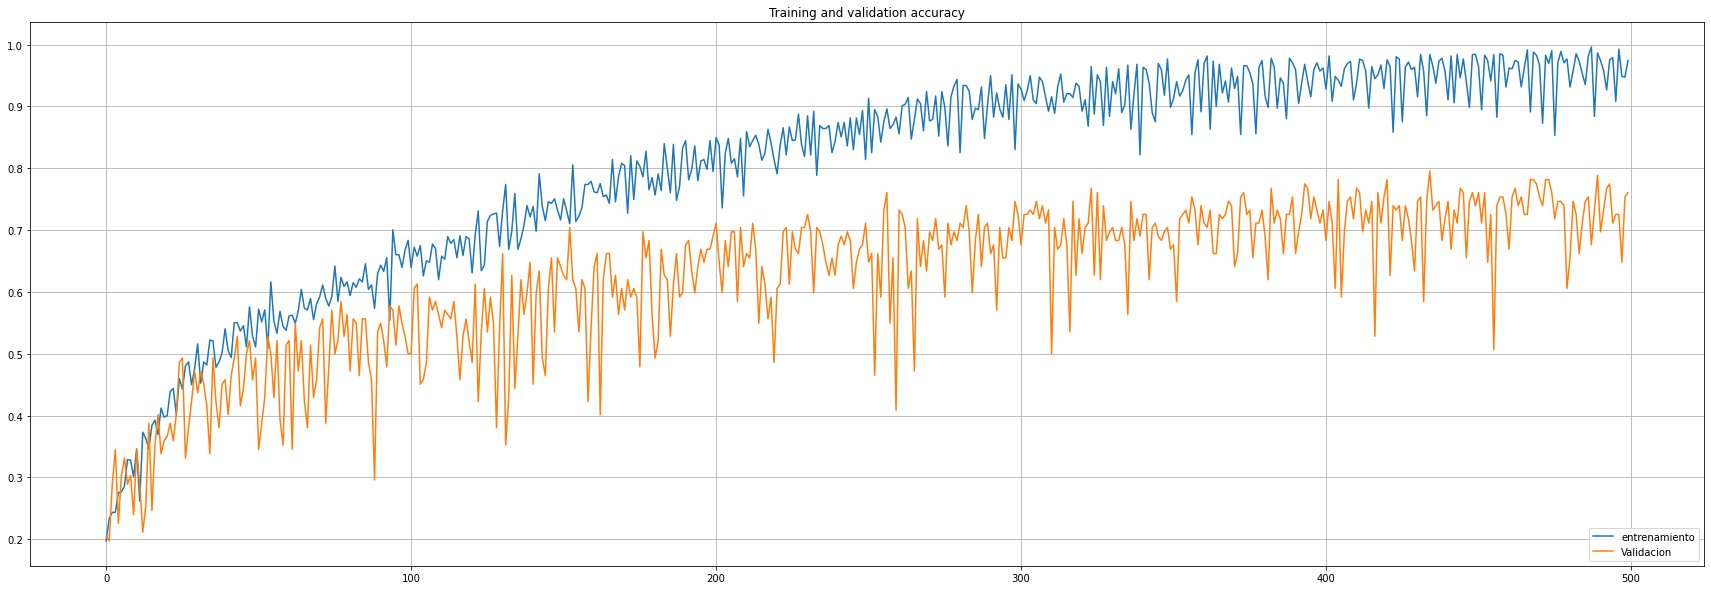

<Figure size 432x288 with 0 Axes>

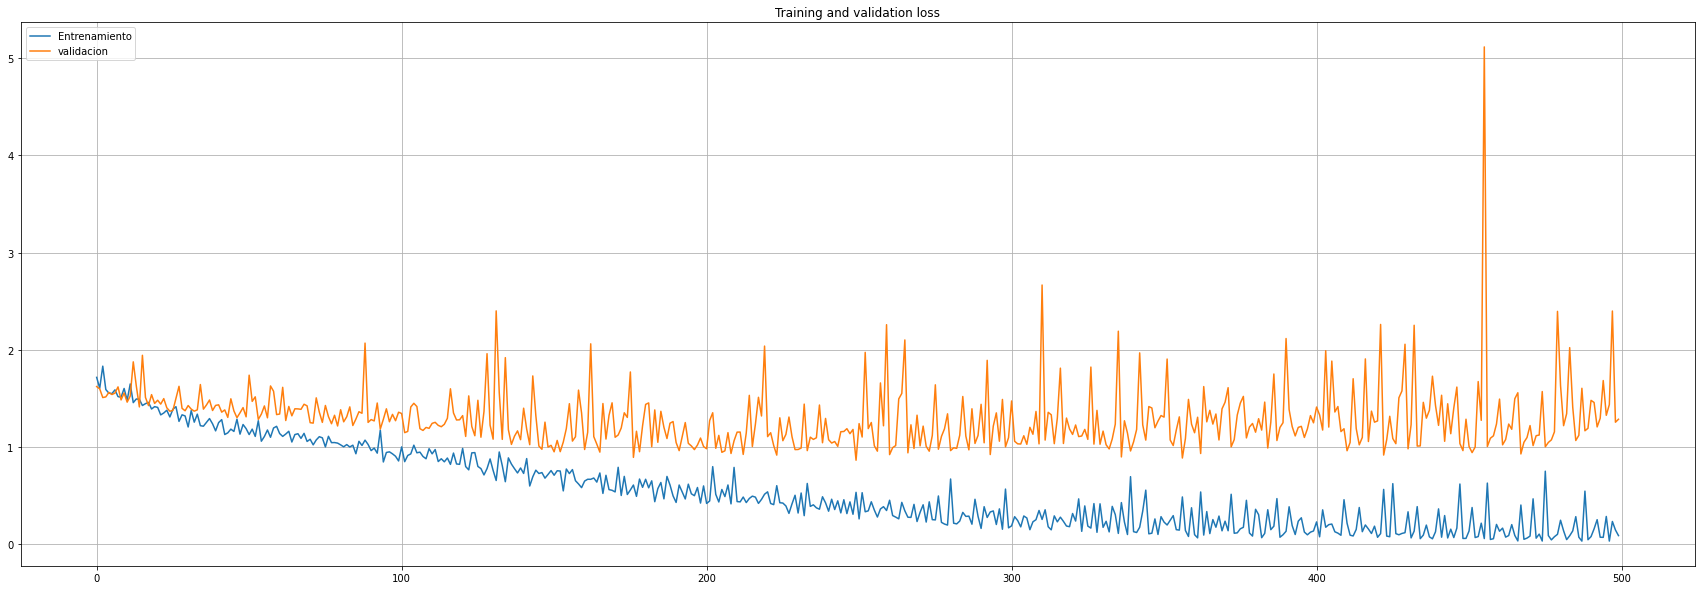

In [ ]:

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Pplotear precicios del entranamiento y al valuidacion por epoca
#------------------------------------------------
plt.figure(figsize=(30,10))
plt.plot  ( epochs,     acc, label='entrenamiento' )
plt.plot  ( epochs, val_acc, label='Validacion' )
plt.title ('Training and validation accuracy')
plt.grid()
plt.legend(loc=4)
plt.figure()

#------------------------------------------------
# plotear perdida en el entranamiento y la validacion por epoca 
#------------------------------------------------
plt.figure(figsize=(30,10))
plt.plot  ( epochs,     loss, label='Entrenamiento' )
plt.plot  ( epochs, val_loss,label=  'validacion')
plt.title ('Training and validation loss'   )
plt.grid()
plt.legend(loc=2)

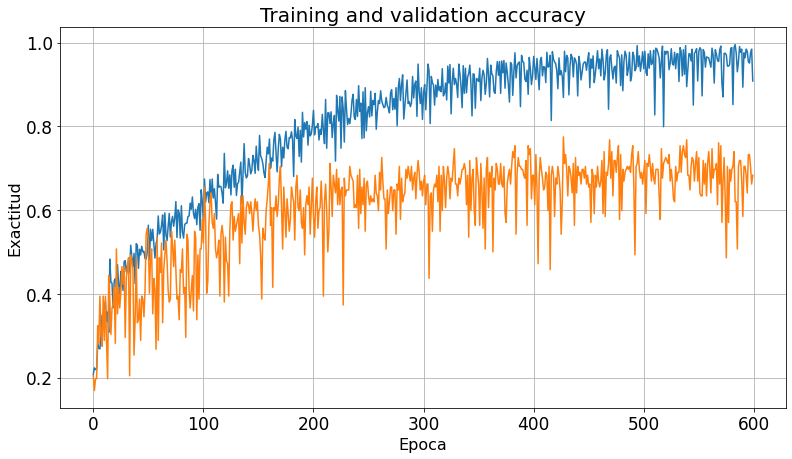

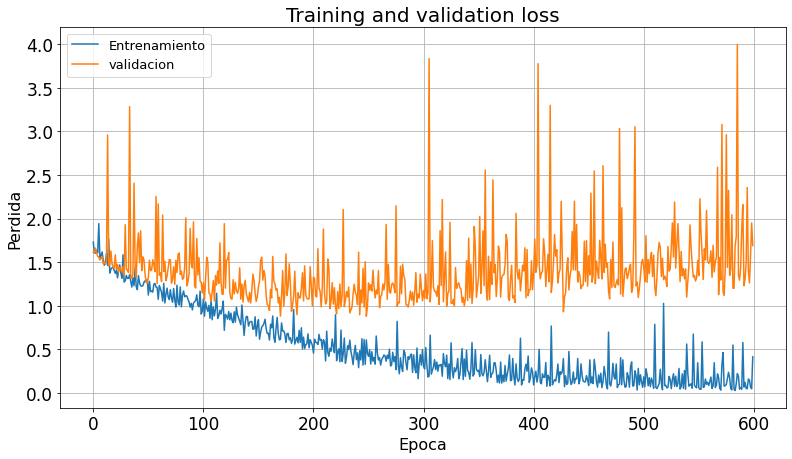

In [35]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Pplotear precicios del entranamiento y al valuidacion por epoca
#------------------------------------------------
parameters = {'xtick.labelsize': 17,
          'ytick.labelsize': 17}
plt.rcParams.update(parameters)
plt.figure(figsize=(13,7))
plt.plot  ( epochs,     acc, label='entrenamiento')
plt.plot  ( epochs, val_acc, label='Validacion' )
plt.title ('Training and validation accuracy',fontsize=20)
plt.xlabel("Epoca",fontsize=16)                       # Configuramos la etiqueta del eje X
plt.ylabel("Exactitud",fontsize=16) 
plt.grid()
plt.show()
#------------------------------------------------
# plotear perdida en el entranamiento y la validacion por epoca 
#------------------------------------------------
fig2=plt.figure(figsize=(13,7))
plt.plot  ( epochs,     loss, label='Entrenamiento' )
plt.plot  ( epochs, val_loss,label=  'validacion')
plt.title ('Training and validation loss'  ,fontsize=20 )
plt.xlabel("Epoca", fontsize=16)                       # Configuramos la etiqueta del eje X
plt.ylabel("Perdida",fontsize=16) 
plt.grid()
plt.legend(loc=2,fontsize=13)

In [ ]:
from numpy import exp
 
# softmax activation function
def softmax(x):
	return exp(x) / exp(x).sum()
 
# define input data
inputs = [1.0, 3.0, 2.0]
print(exp(inputs))
print(exp(inputs).sum())
# calculate outputs
outputs = softmax(inputs)
# report the probabilities
print(outputs)
# report the sum of the probabilities
print(outputs.sum())

[ 2.71828183 20.08553692  7.3890561 ]
30.19287485057736
[0.09003057 0.66524096 0.24472847]
1.0


Referencia:

Auotores de Tensorflow: Course_2_Part_2_Lesson_2_Notebook